<a href="https://colab.research.google.com/github/nitinsingh33/Fake-News-Detection-using-Machine-Learning/blob/main/Fake_News_Detection_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv("/content/drive/MyDrive/2. Projects /ML projects /news.csv")
print(df.head())

print(df.isnull().sum())


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [17]:
# Text preprocessing function
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text


df['cleaned_text'] = df['text'].apply(clean_text)

print(df.head())
df = df.dropna()


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
4  It's primary day in New York and front-runners...  REAL   

                                        cleaned_text  
0  daniel greenfield a shillman journalism fellow...  
1  google pinterest digg linkedin reddit stumbleu...  
2  u s secretary of state john f kerry said monda... 

In [12]:
X = df['cleaned_text']  # Features
y = df['label']  # Target (fake/real)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Convert text to numerical format
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [14]:
# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)


Accuracy: 0.898973954222573
              precision    recall  f1-score   support

        FAKE       0.89      0.91      0.90       628
        REAL       0.91      0.89      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



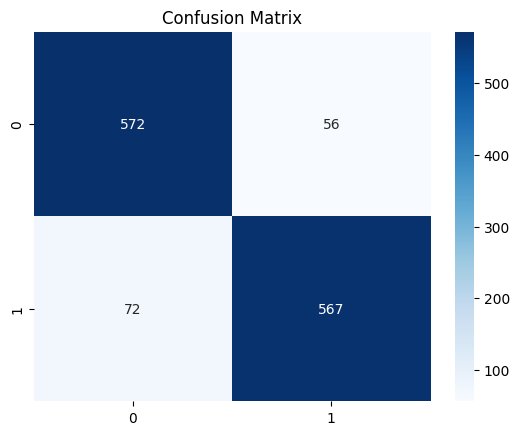

In [15]:
# Model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [18]:
#test the model with custom input

sample_news = ["Breaking: Scientists discover a new planet outside our solar system!"]
sample_news_cleaned = [clean_text(news) for news in sample_news]
sample_news_vectorized = vectorizer.transform(sample_news_cleaned)
prediction = model.predict(sample_news_vectorized)
print("Prediction:", prediction)


Prediction: ['FAKE']
